# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv.zip')
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [3]:
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [4]:
dataset.describe()   #to see the min/max of the columns

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.576e+03,
        5.235e+03, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

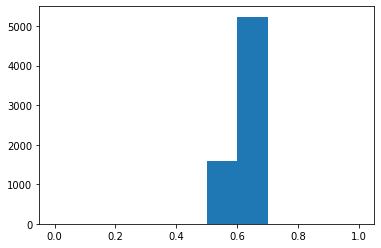

In [5]:
plt.hist(dataset[' Operating Gross Margin'])

(array([3836.,  592.,  487.,  466.,  406.,  292.,  262.,  191.,  150.,
         137.]),
 array([0.000e+00, 9.980e+08, 1.996e+09, 2.994e+09, 3.992e+09, 4.990e+09,
        5.988e+09, 6.986e+09, 7.984e+09, 8.982e+09, 9.980e+09]),
 <a list of 10 Patch objects>)

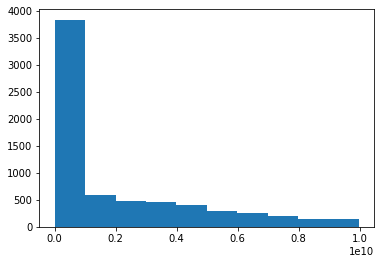

In [6]:
plt.hist(dataset[' Research and development expense rate'])

In [7]:
dataset.info()   #to see if there are any null values in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
{columns : len(dataset[columns].unique()) for columns in dataset} #to check if there ane any columns having a single values

{' Accounts Receivable Turnover': 1593,
 ' After-tax Net Profit Growth Rate': 6246,
 ' After-tax net Interest Rate': 3604,
 ' Allocation rate per person': 6768,
 ' Average Collection Days': 5451,
 ' Borrowing dependency': 4338,
 ' CFO to Assets': 6819,
 ' Cash Flow Per Share': 1545,
 ' Cash Flow to Equity': 6819,
 ' Cash Flow to Liability': 6819,
 ' Cash Flow to Sales': 6819,
 ' Cash Flow to Total Assets': 6819,
 ' Cash Reinvestment %': 3599,
 ' Cash Turnover Rate': 4023,
 ' Cash flow rate': 5557,
 ' Cash/Current Liability': 6816,
 ' Cash/Total Assets': 6819,
 ' Contingent liabilities/Net worth': 1855,
 ' Continuous Net Profit Growth Rate': 6270,
 ' Continuous interest rate (after tax)': 3617,
 ' Current Asset Turnover Rate': 6261,
 ' Current Assets/Total Assets': 6819,
 ' Current Liabilities/Equity': 6819,
 ' Current Liabilities/Liability': 6627,
 ' Current Liability to Assets': 6819,
 ' Current Liability to Current Assets': 6819,
 ' Current Liability to Equity': 6819,
 ' Current Liab

In [9]:
dataset.drop(' Net Income Flag', axis = 1, inplace = True)       # The 'Net Income Flag' column is dropped because it consists of only one value i.e. 1.

In [10]:
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207

# Visualizing the Dataset

In [11]:
Bankrupt = dataset[dataset['Bankrupt?']==1]
Not_Bankrupt = dataset[dataset['Bankrupt?']==0]

In [12]:
print("Total =", len(dataset))

print("Number of companies that are Bankrupt =", len(Bankrupt))
print("Percentage of bankrput companies  =", 1.*len(Bankrupt)/len(dataset)*100.0, "%")
 
print("Number of companies that are NOT Bankrupt =", len(Not_Bankrupt))
print("Percentage of not bankrupt companies =", 1.*len(Not_Bankrupt)/len(dataset)*100.0, "%")

Total = 6819
Number of companies that are Bankrupt = 220
Percentage of bankrput companies  = 3.2262795131250916 %
Number of companies that are NOT Bankrupt = 6599
Percentage of not bankrupt companies = 96.77372048687491 %


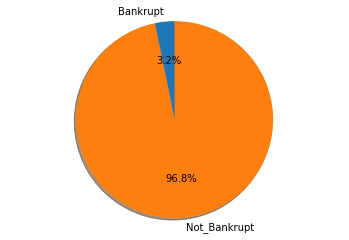

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bankrupt', 'Not_Bankrupt'
sizes = [len(Bankrupt), len(Not_Bankrupt)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.'''
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [19]:
import seaborn as sns
plt.figure(figsize= (5,5))
sns.boxplot(x= 'Bankrupt?', y= '', data = dataset)

ValueError: ignored

<Figure size 360x360 with 0 Axes>

# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

## Training the Model


In [ ]:
original_models = {
    "       Logistic Regression" : LogisticRegression(random_state = 0),
    "    Support Vector Machine" : SVC(kernel = 'linear', random_state = 0),
    "             Decision Tree" : DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
}
for name, model in original_models.items():
  model.fit(X_train, y_train)
  print(name + ' trained')

In [ ]:
original_results = []

for name,model in original_models.items():
  result = model.score(X_test, y_test)
  original_results.append(result)
  print(name + " : {:.2f}%".format(result*100))

# Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
n_components = 95
pca = PCA(n_components = n_components)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index, columns=['PC'+ str(i) for i in range(1, n_components+1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=['PC'+ str(i) for i in range(1, n_components+1)])

In [ ]:
X_test_reduced

In [ ]:
X_test_reduced.describe()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
import seaborn as sns
sns.barplot(x = ['PC'+ str(i) for i in range(1, n_components+1)], y = pca.explained_variance_ratio_)
sns.set(rc= {'figure.figsize':(20,10)})
plt.ylabel('Variance Ratio')
plt.xticks(rotation=90)
plt.show()

In [ ]:
n_components_2 = 10
pca_2 = PCA(n_components = n_components_2)
X_train_reduced2 = pd.DataFrame(pca_2.fit_transform(X_train), index=X_train.index, columns=['PC'+ str(i) for i in range(1, n_components_2+1)])
X_test_reduced2 = pd.DataFrame(pca_2.transform(X_test), index=X_test.index, columns=['PC'+ str(i) for i in range(1, n_components_2+1)])

In [ ]:
X_test_reduced

In [ ]:
X_test_reduced2

In [ ]:
pca_2.explained_variance_ratio_

In [ ]:
import seaborn as sns
sns.barplot(x = ['PC'+ str(i) for i in range(1, n_components_2+1)], y = pca_2.explained_variance_ratio_)
sns.set(rc= {'figure.figsize':(20,10)})
plt.ylabel('Variance Ratio')
plt.xticks(rotation=90)
plt.show()

In [ ]:
reduced_models = {
    "       Logistic Regression" : LogisticRegression(random_state = 0),
    "    Support Vector Machine" : SVC(kernel = 'linear', random_state = 0),
    "             Decision Tree" : DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
}
for name, model in reduced_models.items():
  model.fit(X_train_reduced, y_train)
  print(name + ' trained')

In [ ]:
reduced_models_2 = {
    "       Logistic Regression" : LogisticRegression(random_state = 0),
    "    Support Vector Machine" : SVC(kernel = 'linear', random_state = 0),
    "             Decision Tree" : DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
}
for name, model in reduced_models_2.items():
  model.fit(X_train_reduced2, y_train)
  print(name + ' trained')

In [ ]:
reduced_results = []

for name, model in reduced_models.items():
  result = model.score(X_test_reduced, y_test)
  original_results.append(result)
  print(name + " : {:.2f}%".format(result*100))


In [ ]:
reduced_results2 = []

for name, model in reduced_models_2.items():
  result = model.score(X_test_reduced2, y_test)
  original_results.append(result)
  print(name + " : {:.2f}%".format(result*100))
